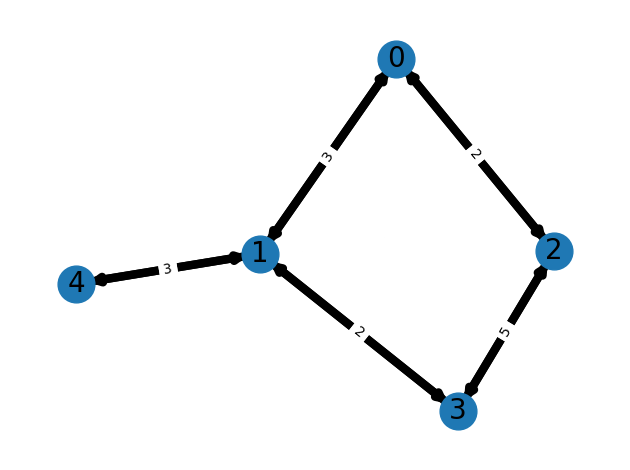

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

graph_edge_list = '''
    0 1 3
    0 2 2
    1 3 2
    1 4 3
    2 3 5
'''

G = nx.DiGraph()

for line in graph_edge_list.split('\n'):
    if line:
        u, v, weight = line.split()
        G.add_edge(int(u), int(v), weight=int(weight))
        G.add_edge(int(v), int(u), weight=int(weight))

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=6)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


In [59]:
import numpy as np

# Floyd-Warshall algorithm
def floyd_warshall(graph):
    dist = np.array([[np.inf] * len(graph) for _ in range(len(graph))])
    prev = np.array([[None] * len(graph) for _ in range(len(graph))])

    edges = graph.edges(data=True)
    for (u, v, data) in edges:
        dist[u][v] = data["weight"]
        prev[v] = u

    for u in graph.nodes():
        dist[u][u] = 0
        prev[u] = u

    for k in graph.nodes():
        for i in graph.nodes():
            for j in graph.nodes():
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    prev[i][j] = prev[k][j]

    return (dist, prev)

dist, prev = floyd_warshall(G)

# Output:
print(dist)
print(prev)


[[0. 3. 2. 5. 6.]
 [3. 0. 5. 2. 3.]
 [2. 5. 0. 5. 8.]
 [5. 2. 5. 0. 5.]
 [6. 3. 8. 5. 0.]]
[[0 0 0 1 1]
 [1 1 0 1 1]
 [2 0 2 2 1]
 [1 3 3 3 1]
 [1 4 0 1 4]]


In [60]:

def path(prev, u, v):
    if prev[u][v] is None:
        return []
    path = [v]
    while u != v:
        v = prev[u][v]
        path.insert(0, v)
    return path

# Output:
print(path(prev, 0, 3))

[0, 1, 3]


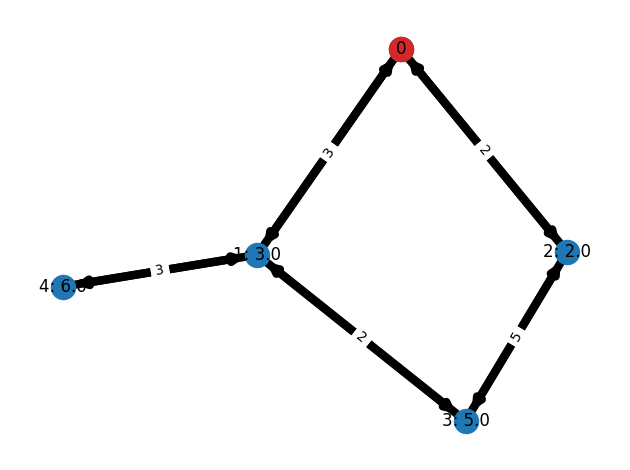

In [ ]:
# Visualisierung
start = 0

# Markiere den Startknoten in rot
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_nodes(G, pos, nodelist=[start], node_color="tab:red")

labels = {}

paths = [path(prev, start, v) for v in G.nodes()]

for v in G.nodes():
    if dist[start][v] == 0:
        labels[v] = v
        continue

    labels[v] = f"{v}: {dist[start][v]}"

nx.draw_networkx_labels(G, pos, labels)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=6)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.tight_layout()
plt.axis("off")
plt.show()